## Primer 1
### Upoređivanje različitih online algoritama

Na ovom primeru videćemo kako se pojedini online algoritmi ponašaju za različite vrednosti odnosa veličina skupova podataka za testiranje i treniranje.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
# odnosi veličina test i trening skupa podataka
heldout = [0.95, 0.90, 0.75, 0.50, 0.01]

# broj treniranih modela nakon kojeg uprosečavamo dobijene greške
rounds = 10

Koristićemo slike rukom pisanih cifara formata 8x8. Kao što možemo videti u nastavku, skup podataka sastoji se od 1797 slika.

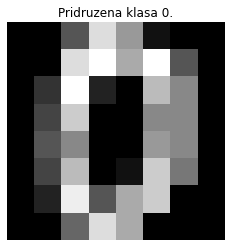

In [4]:
# učitavamo podatke
digits = datasets.load_digits()

# prikazujemo prvu cifru iz skupa podataka
plt.title('Pridruzena klasa {0}.'.format(digits.target[0]))
plt.axis('off')
plt.imshow(digits.images[0], cmap='gray')
plt.show()

In [5]:
X = digits.data
X.shape

(1797, 64)

In [6]:
y = digits.target
y.shape

(1797,)

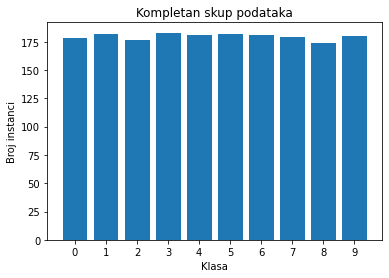

In [7]:
# prikazujemo raspodelu slika po klasama
classes = np.unique(y)
plt.xlabel('Klasa')
plt.ylabel('Broj instanci')
plt.title ('Kompletan skup podataka')

plt.xticks(classes)

plt.bar(classes, np.bincount(y))
plt.show()

Napravićemo sledećih 5 modela:
 - linearni SVM model sa stohastičkim gradijentnim spustom (**SGD**)
 - linearni SVM model sa stohastičkim gradijentnim spustom i uprosečavanjem (**ASGD**)
 - Passive-Aggressive I model
 - Passive-Aggressive II model
 - model logističke regresije sa uprosečenim stohastičkim gradijentnom (**SAG**)

training SGD
training ASGD
training Passive-Aggressive I
training Passive-Aggressive II
training SAG


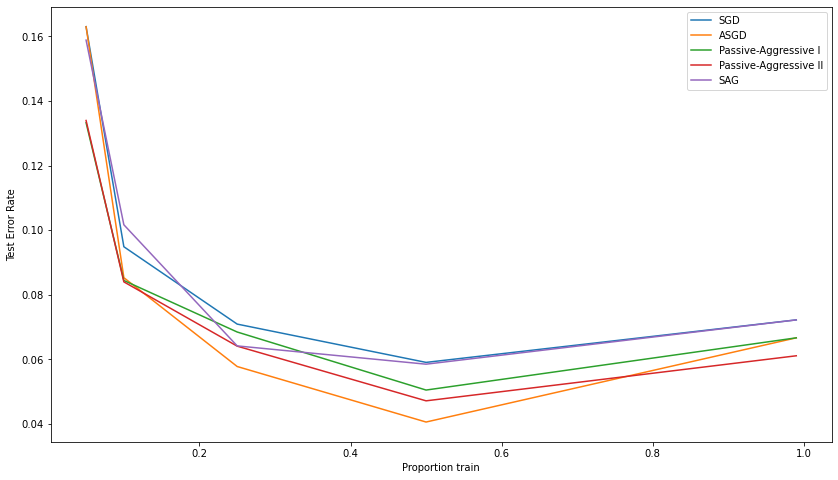

In [8]:
# definišemo modele
classifiers = [
    ("SGD", SGDClassifier(max_iter=110, loss="hinge", penalty="l2", alpha=0.0001)),
    ("ASGD", SGDClassifier(max_iter=110, loss="hinge", average=True, penalty="l2", alpha=0.0001)),
    (
        "Passive-Aggressive I",
        PassiveAggressiveClassifier(max_iter=110, loss="hinge", C=1.0, tol=1e-4),
    ),
    (
        "Passive-Aggressive II",
        PassiveAggressiveClassifier(
            max_iter=110, loss="squared_hinge", C=1.0, tol=1e-4
        ),
    ),
    (
        "SAG",
        LogisticRegression(max_iter=110, solver="sag", tol=1e-1, C=1.0e4 / X.shape[0]),
    ),
]

xx = 1.0 - np.array(heldout)
plt.figure(figsize=(14, 8))

# za svaki model za klasifikaciju
for name, clf in classifiers:
    
    # ispisujemo trenutni model koje se trenira
    print("training %s" % name)
    
    rng = np.random.RandomState(42)
    
    # ovde čuvamo uprosečene greške modela 
    yy = []
    
    # za svaki odnos test i trening skupa podataka
    for i in heldout:
        
        # ovde čuvamo trenutne greške modela
        yy_ = []
        
        # ponavljamo postupak rounds puta
        for r in range(rounds):
            
            # delimo podatke na skupove u zadatom odnosu veličina
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=i, random_state=rng
            )
            
            # treniramo model
            clf.fit(X_train, y_train)
            
            # vršimo predviđanja i merimo greške
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
            
        yy.append(np.mean(yy_))
    
    # dodajemo dobije rezultate na grafik
    plt.plot(xx, yy, label=name)

# prikazujemo grafik
plt.legend(loc="best")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()

Sa grafika vidimo da se svi modeli ponašaju isto za različite odnose trening i test skupa podataka i da u proseku najmanje greše za odnos `1:1` tj. sa 1797/2 = 898 instanci u test skupu i 899 instanci u trening skupu. Primetimo takođe da se oba pasivno-agresivna modela ponašaju gotovo identično na ovim skupovima podataka.

Izvor: [Comparing various online solvers](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_comparison.html#sphx-glr-auto-examples-linear-model-plot-sgd-comparison-py)